# Data Visualization With Safas

This notebook demonstrates plotting the results from Safas video analysis.

## Import modules and data

Import safas  and other components for display and analysis. safas has several example images in the safas/data directory. These images are accessible as attributes of the data module because the __init__ function of safas/data also acts as a loader.   

In [1]:
import sys
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter   
%matplotlib inline

import pandas as pd
import cv2

from safas import filters
from safas import data
from safas.filters.sobel_focus import imfilter as sobel_filter
from safas.filters.imfilters_module import add_contours

## Object properties
Users may interactively select and link objects in safas. When the data is saved, the data is written in tabular form where the properties of each oject are stored. 

The object properties are calculated with the Scikit-Image function [regionprops.](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops). A complete description of these properties may be found in the [regionprops.](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) documentation. At this time, the following properties are stored in a .xlsx file: 

property | unit |
--- | --- |
area | $\mu m^2$ | 
equivalent_diameter | $\mu m$ | 
perimeter | $\mu m$ | 
euler_number | -- |
minor_axis_length | $\mu m$ | 
major_axis_length	| $\mu m$ | 
extent	| -- | 

If a selected object is linked to an object in the next frame, the instantaneous velocity will be calculated based on the displacement of the object centroid and the frame rate of the video. 

property | unit | description
--- | --- | ---|
vel_mean | [mm/s]	| velocity |
vel_N	| [--] | number of objects linked|
vel_std | [mm/s] | standard deviation of velocity |


## Plot a settling velocity versus floc size


In [2]:
# load the excel file as a Pandas DataFrame
df = pd.read_excel('data/floc_props.xlsx')
# see the keys
print(df.keys())


Index(['Unnamed: 0', 'area', 'equivalent_diameter', 'perimeter',
       'euler_number', 'minor_axis_length', 'major_axis_length', 'extent',
       'vel_mean', 'vel_N', 'vel_std'],
      dtype='object')


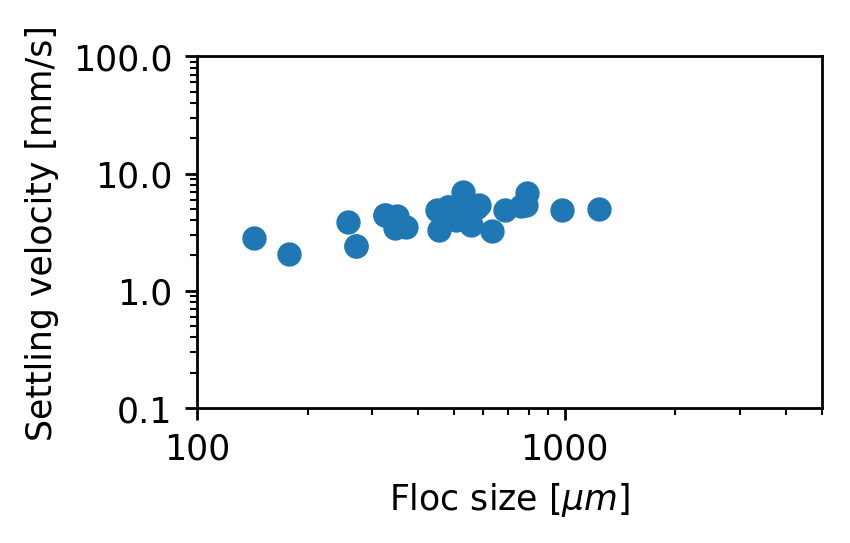

In [5]:
# plot velocity vs major_axis_length
f, ax = plt.subplots(1,1, figsize=(3.5, 2.2), dpi=250)

# note: remove *10 factor if floc_props.xlsx file is updated: previous version was output in [cm/s]
ax.plot(df.major_axis_length, df.vel_mean*10, marker='o', linestyle='None')
ax.set_xlabel('Floc size [$\mu m$]')
ax.set_ylabel('Settling velocity [mm/s]')

# convert to log-log
ax.loglog()
ax.axis([100, 5000, 0.1, 100])

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

plt.tight_layout()

save = True

if save: 
    plt.savefig('png/vel_size.png', dpi=900)